## Credit Card Fraud Project

### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

### Importing the Data

In [2]:
data = pd.read_csv('creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### Exploratory Data Analysis

In [3]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
print(data.Class.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [5]:
counts = data['Class'].value_counts()
labels = ['not fraud', 'fraud']
quantity = counts.values

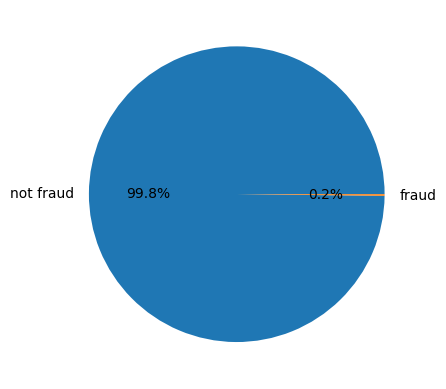

In [6]:
fig, ax = plt.subplots()
ax.pie(quantity, labels = labels, autopct = '%1.1f%%')
plt.show()

### Splitting into Train and Test Sets
Ensuring that test and train sets have similar proportions of fraudulent and non-fraudulent results

In [7]:
x = data.drop('Class', axis = 1)
y = data['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

#### Checking that proportions of fraudulent and non-fraudulent data are maintained acrosss train and test sets

In [8]:
ytrain_rows = ytrain.shape[0]
ytrain_pos = sum(ytrain)

ytrain_pos / ytrain_rows

0.001729245759178389

In [9]:
ytest_rows = ytest.shape[0]
ytest_pos = sum(ytest)

ytest_pos / ytest_rows

0.0017204452090867595

### Modeling the Data

#### Decision Tree Classifier

In [10]:
tree = DecisionTreeClassifier()
tree.fit(xtrain, ytrain)
ypred = tree.predict(xtest)

In [11]:
accuracy = metrics.accuracy_score(ytest, ypred)
precision = metrics.precision_score(ytest, ypred)
recall = metrics.recall_score(ytest, ypred)
f1 = metrics.f1_score(ytest, ypred)

In [12]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9990344440153085
Precision: 0.7128712871287128
Recall: 0.7346938775510204
F1 score: 0.7236180904522613


#### Random Forest Classifier

In [13]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [14]:
ypred = rf.predict(xtest)

In [15]:
probs = rf.predict_proba(xtest)
preds = probs[:,1]

fpr, tpr, thresholds = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

In [16]:
accuracy = metrics.accuracy_score(ytest, ypred)
precision = metrics.precision_score(ytest, ypred)
recall = metrics.recall_score(ytest, ypred)
f1 = metrics.f1_score(ytest, ypred)

In [17]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9995962220427653
Precision: 0.9411764705882353
Recall: 0.8163265306122449
F1 score: 0.8743169398907104


In [18]:
cm = metrics.confusion_matrix(ytest, ypred)
cm

array([[56859,     5],
       [   18,    80]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

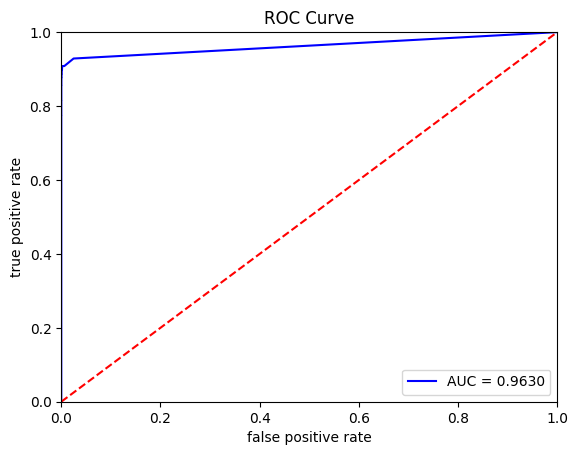

In [19]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC Curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show

### Results

The Random Forest Classifier showed an overall improvement in all metrics (accuracy, precision, recall, and F1 score) compared to the Decision Tree Classifier.

Final metrics:
- Accuracy: 0.9996
- Precision: 0.9412
- Recall: 0.8163
- F1 score: 0.8743